In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import mne
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon
from statannotations.Annotator import Annotator

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *

In [98]:
good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()
ch_names_64, ch_names_72 = load_channels()
downfreq = 128

In [63]:
subjects_to_process = good_listen_subjects
task = 'listen'
periods = ['pre', 'post']

In [4]:
#-----------------------------
#           DIRECTORIES
#-----------------------------

evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data'



In [9]:
epochs_df = load_epochs_bysubject(subjects_to_process, task)

Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  02
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_02.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_06.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  07
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_07.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
3

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_06.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  13
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_13.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audi

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_13.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_18.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  19
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_19.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_19.fif ...
    Found the data of interest:
  

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_post_18.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_19.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:344: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Pia

In [58]:
def integral_power_erp(epochs, channels = 'all'):
    """ 
    Takes area under the ERP curve. 
    Epochs: epochs data of shape n_channels x n_timepoints, all epochs from one subject should already be averaged
    ---
    Returns the absolute area (area under absolute ERP curve, areas below 0 are counted as positive)
    """
    if channels == 'all':
        epochs_sub = epochs.copy()
    else:
        assert isinstance (list, channels)
        ch_idx = ch_index(['Cz'])
        epochs_sub = epochs.copy()[ch_idx, :] #taking only the channels of interest

    epochs_ave = np.mean(epochs_sub, axis = 0) #averaging over all channels
    global epochs1
    epochs1 = epochs_ave
    integral_power = np.trapz(np.abs(epochs_ave))

    return integral_power

6.429266530632551e-05

In [62]:
epochs_df.iloc[0]['epochs'].shape

(64, 91)

In [76]:
epochs_df[(epochs_df['subject'] == subject)&(epochs_df['period'] == period)]['epochs']

AttributeError: 'Series' object has no attribute 'get_data'

In [90]:
#get integral of epochs
integral_power = pd.DataFrame(columns=['subject', 'period', 'integral_power'])
for period in periods: 
    for subject in subjects_to_process:
        epochs_sub = epochs_df[(epochs_df['subject'] == subject)&(epochs_df['period'] == period)]
        epochs_sub = epochs_sub['epochs'].values[0]
        integral_power = integral_power_erp(epochs_sub)
        df_temp = pd.DataFrame({
            'subject':subject,
            'period': period,
            'integral_power': integral_power
        })
        integral_power = pd.concat([integral_power, df_temp])
        

ValueError: If using all scalar values, you must pass an index

In [103]:
# Get integral of epochs
integral_power_df = pd.DataFrame(columns=['subject', 'period', 'musician', 'integral_power'])
for period in periods: 
    for subject in subjects_to_process:
        musician = ['musician' if subject in musicians else 'nonmusician']
        # Filter the dataframe to get the specific subject and period
        epochs_sub = epochs_df[(epochs_df['subject'] == subject) & (epochs_df['period'] == period)]
        epochs_sub = epochs_sub['epochs'].values[0]
        
        # Calculate the integral power
        integral_power_value = integral_power_erp(epochs_sub)
        
        # Create a temporary dataframe with list values
        df_temp = pd.DataFrame({
            'subject': subject,
            'period': period,
            'musician': musician,
            'integral_power': integral_power_value
        })
        
        # Concatenate the temporary dataframe with the main dataframe
        integral_power_df = pd.concat([integral_power, df_temp], ignore_index=True)


In [105]:
# Get integral of epochs
integral_power_df = pd.DataFrame(columns=['subject', 'period', 'musician', 'integral_power'])

for period in periods: 
    for subject in subjects_to_process:
        # Determine if the subject is a musician or not
        musician = 'musician' if subject in musicians else 'nonmusician'
        
        # Filter the dataframe to get the specific subject and period
        epochs_sub = epochs_df[(epochs_df['subject'] == subject) & (epochs_df['period'] == period)]
        epochs_sub = epochs_sub['epochs'].values[0]
        
        # Calculate the integral power
        integral_power_value = integral_power_erp(epochs_sub)
        
        # Create a temporary dataframe with scalar values
        df_temp = pd.DataFrame({
            'subject': [subject],
            'period': [period],
            'musician': [musician],
            'integral_power': [integral_power_value]
        })
        
        # Concatenate the temporary dataframe with the main dataframe
        integral_power_df = pd.concat([integral_power_df, df_temp], ignore_index=True)



In [93]:
integral_power_df

,subject,period,integral_power
0,01,pre,0.000064
1,02,pre,0.000094
2,03,pre,0.000064
3,04,pre,0.000073
4,05,pre,0.000078
5,06,pre,0.000074
6,07,pre,0.000086
7,08,pre,0.000082
8,09,pre,0.000080
9,10,pre,0.000049


<Axes: xlabel='period', ylabel='integral_power'>

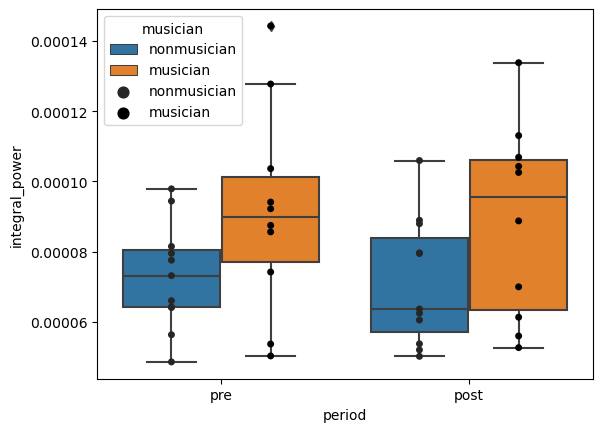

In [107]:
plt.figure()
sns.boxplot(data = integral_power_df, x = 'period', y = 'integral_power', hue = 'musician')
sns.stripplot(data = integral_power_df, x = 'period', y = 'integral_power', hue = 'musician', dodge=True, jitter=False, color = 'black')